In [ ]:

from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import torch
import torchvision
from torchvision import models
from torch.utils.data import DataLoader
from torchvision import transforms as T
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
from tqdm.notebook import tqdm


import torch
import torchvision
import torchvision.transforms as transforms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
import glob, os
import tensorflow as tf
import logging
tf.get_logger().setLevel(logging.ERROR)

#import tensorflow_addons as tfa
import tensorflow as tf
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
import cv2
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from PIL import Image
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import *
from tensorflow.keras.applications import EfficientNetB7, inception_v3
import random
import time
import torch
from sklearn.metrics import classification_report
size=224

In [ ]:
model = load_model('.../VGGmodel.h5')

In [ ]:
num_classes=2

In [ ]:
import numpy as np
from scipy.stats import entropy
base = 2

pk = np.array([0, 1])
e_2 = entropy(pk, base=base)
print("range of birads 2: ",e_2)

pk = np.array([0.02, 0.98])
e_3_1 = entropy(pk, base=base)
print("1_range of birads 3: ",e_3_1)
pk = np.array([0.0, 1])
e_3_2 = entropy(pk, base=base)
print("2_range of birads 3: ",e_3_2)
print("_________")

pk = np.array([0.02, 0.98])
e_4a_1 = entropy(pk, base=base)
print("1_range of birads 4a: ",e_4a_1)
pk = np.array([0.1, 0.90])
e_4a_2 = entropy(pk, base=base)
print("2_range of birads 4a: ",e_4a_2)
print("_________")

pk = np.array([0.1, 0.9])
e_4b_1 = entropy(pk, base=base)
print("1_range of birads 4b: ",e_4b_1)
pk = np.array([0.5, 0.5])
e_4b_2 = entropy(pk, base=base)
print("2_range of birads 4b: ",e_4b_2)
print("_________")

pk = np.array([0.5, 0.5])
e_4c_1 = entropy(pk, base=base)
print("1_range of birads 4c: ",e_4c_1)
pk = np.array([0.95, 0.05])
e_4c_2 = entropy(pk, base=base)
print("2_range of birads 4c: ",e_4c_2)
print("_________")

pk = np.array([0.95, 0.05])
e_5_1 = entropy(pk, base=base)
print("1_range of birads 5: ",e_5_1)
pk = np.array([1, 0])
e_5_2 = entropy(pk, base=base)
print("2_range of birads 5: ",e_5_2)


In [ ]:
## Birads 0

address = ".../CBIS_DDSM/Test/Benign/b0/*"
import math
all_images1 = []
all_labels1 = []
all_labels_birads1 = []
directory1=[]
for each_img in glob.glob(address):
    img=cv2.imread(each_img)
    img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    img=cv2.resize(img,(size,size))
    #img=cv2.merge([img,img,img])
    #img_resize= img/255
    all_images1.append(img)
    labels = each_img.split("/")[-3]
    all_labels1.append(labels)
    all_labels_birads1.append(0)
    labels = each_img.split("/")[-1]
    directory1.append(labels)

address = ".../CBIS_DDSM/Test/Malignant/b0/*"
import math
all_images2 = []
all_labels2 = []
all_labels_birads2 = []
directory2=[]
for each_img in glob.glob(address):
    img=cv2.imread(each_img)
    img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    img=cv2.resize(img,(size,size))
    #img=cv2.merge([img,img,img])
    #img_resize= img/255
    all_images2.append(img)
    labels = each_img.split("/")[-3]
    all_labels2.append(labels)
    all_labels_birads2.append(0)
    labels = each_img.split("/")[-1]
    directory2.append(labels)
all_images = all_images1 + all_images2
all_labels = all_labels1 + all_labels2
all_labels_birads = all_labels_birads1 + all_labels_birads2
directory  = directory1 + directory2
x_test_b0=np.array(all_images)
y_test_b0=np.array(all_labels)
y_test_b0_b=np.array(all_labels_birads)
print("all images:",len(x_test_b0),x_test_b0.shape)
print("all labels:",len(y_test_b0),y_test_b0.shape)
print("all labels b:",len(y_test_b0_b),y_test_b0_b.shape)
#print(directory)
le = LabelEncoder()

y_test_b0 = le.fit_transform(y_test_b0)
print(list(le.inverse_transform([0, 1])))

#print(directory)


y_test_b0 = keras.utils.to_categorical(y_test_b0, num_classes)
#test_labels = keras.utils.to_categorical(test_labels, num_classes)
print("y_test_b0",y_test_b0.shape)
xxx = model.predict(x_test_b0)
xx = np.argmax(xxx,axis=1)
test_labels11=np.argmax(y_test_b0, axis=1)
print("result b0")
print(classification_report(test_labels11, xx, digits=4))


import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score
sigma=1
num_MC_samples = 200
cvscores1_MC = []
MC_samples = [model(x_test_b0)for _ in range(num_MC_samples)]
y_samples_mean_b0 = np.mean(MC_samples, axis=0)
y_sample_var = sigma**2 + np.var(MC_samples, axis=0)
expected_p = np.mean(MC_samples, axis=0)
predictive_entropy_b0 = -np.sum(expected_p *np.log(expected_p), axis=-1)
#_________________
y_pred=np.argmax(y_samples_mean_b0,axis=1)

#EVAL

y_test_b0=np.argmax(y_test_b0,axis=1)
y_test1=y_test_b0
mcdropout_acc_bus1 = accuracy_score(y_test1, y_pred)
mcdropout_precision = precision_score(y_test1, y_pred, average='weighted')
mcdropout_recall = recall_score(y_test1, y_pred, average='weighted')
mcdropout_F1 = (2 * mcdropout_precision * mcdropout_recall) / (mcdropout_precision + mcdropout_recall)
result = [ mcdropout_acc_bus1 * 100, mcdropout_precision * 100, mcdropout_recall * 100, mcdropout_F1 * 100]
print("b0: ","[{:0.5f}, {:0.5f}, {:0.5f}, {:0.5f}]\n".format(*result))
cvscores1_MC.append(mcdropout_acc_bus1 * 100)
print(cvscores1_MC)


plt.hist(predictive_entropy_b0)
plt.xlabel('predictive_entropy_b0')
plt.ylabel('Density')
plt.title('Birads 0')
plt.grid(True)
plt.show()









In [ ]:
## Birads 2

address = ".../CBIS_DDSM/Test/Benign/b2/*"
import math
all_images1 = []
all_labels1 = []
all_labels_birads1 = []
directory1=[]
for each_img in glob.glob(address):
    img=cv2.imread(each_img)
    img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    img=cv2.resize(img,(size,size))
    #img=cv2.merge([img,img,img])
    #img_resize= img/255
    all_images1.append(img)
    labels = each_img.split("/")[-3]
    all_labels1.append(labels)
    all_labels_birads1.append("b2")
    labels = each_img.split("/")[-1]
    directory1.append(labels)

address = ".../CBIS_DDSM/Test/Malignant/b2/*"
import math
all_images2 = []
all_labels2 = []
all_labels_birads2 = []
directory2=[]
for each_img in glob.glob(address):
    img=cv2.imread(each_img)
    img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    img=cv2.resize(img,(size,size))
    #img=cv2.merge([img,img,img])
    #img_resize= img/255
    all_images2.append(img)
    labels = each_img.split("/")[-3]
    all_labels2.append(labels)
    all_labels_birads2.append("b2")
    labels = each_img.split("/")[-1]
    directory2.append(labels)
all_images = all_images1 + all_images2
all_labels = all_labels1 + all_labels2
all_labels_birads = all_labels_birads1 + all_labels_birads2
directory  = directory1 + directory2
x_test_b0=np.array(all_images)
y_test_b0=np.array(all_labels)
y_test_b0_b=np.array(all_labels_birads)
print("all images:",len(x_test_b0),x_test_b0.shape)
print("all labels:",len(y_test_b0),y_test_b0.shape)
print("all labels b:",len(y_test_b0_b),y_test_b0_b.shape)
#print(directory)
le = LabelEncoder()

y_test_b0 = le.fit_transform(y_test_b0)
print(list(le.inverse_transform([0, 1])))


y_test_b0 = keras.utils.to_categorical(y_test_b0, num_classes)
#test_labels = keras.utils.to_categorical(test_labels, num_classes)
print("y_test_b0",y_test_b0.shape)
xxx = model.predict(x_test_b0)
xx = np.argmax(xxx,axis=1)
test_labels11=np.argmax(y_test_b0, axis=1)
print("result b0")
print(classification_report(test_labels11, xx, digits=4))


import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score
sigma=1
num_MC_samples = 200
cvscores1_MC = []
MC_samples = [model(x_test_b0)for _ in range(num_MC_samples)]
y_samples_mean_b0 = np.mean(MC_samples, axis=0)
y_sample_var = sigma**2 + np.var(MC_samples, axis=0)
expected_p = np.mean(MC_samples, axis=0)
predictive_entropy_b0 = -np.sum(expected_p *np.log(expected_p), axis=-1)
#_________________
y_pred=np.argmax(y_samples_mean_b0,axis=1)

#EVAL
#y_test_bus1 = keras.utils.to_categorical(y_test_bus1, num_classes)
y_test_b0=np.argmax(y_test_b0,axis=1)
y_test1=y_test_b0
mcdropout_acc_bus1 = accuracy_score(y_test1, y_pred)
mcdropout_precision = precision_score(y_test1, y_pred, average='weighted')
mcdropout_recall = recall_score(y_test1, y_pred, average='weighted')
mcdropout_F1 = (2 * mcdropout_precision * mcdropout_recall) / (mcdropout_precision + mcdropout_recall)
result = [ mcdropout_acc_bus1 * 100, mcdropout_precision * 100, mcdropout_recall * 100, mcdropout_F1 * 100]
print("b0: ","[{:0.5f}, {:0.5f}, {:0.5f}, {:0.5f}]\n".format(*result))
cvscores1_MC.append(mcdropout_acc_bus1 * 100)
print(cvscores1_MC)


plt.hist(predictive_entropy_b0)
plt.xlabel('predictive_entropy_b2')
plt.ylabel('Density')
plt.title('Birads 2')
plt.grid(True)
plt.show()

l=[]
for i in range(len(y_pred)):
    if y_pred[i]==0:
        if 0<=predictive_entropy_b0[i] <=0.0001:
            l.append("b2")
        elif 0.0001<=predictive_entropy_b0[i] <=e_3_1:
            l.append("b3")
        elif e_4a_1<=predictive_entropy_b0[i] <=e_4a_2 :
            l.append("b4")
        elif e_4b_1<=predictive_entropy_b0[i] <=e_4b_2:
            l.append("b4")


    if y_pred[i]==1:
        if e_5_2<=predictive_entropy_b0[i] <=e_5_1:
            l.append("b5")
        elif e_4c_2<=predictive_entropy_b0[i] <=e_4c_1:
            l.append("b4")


#l=np.array(l)
#eval per class
from sklearn.metrics import classification_report
y_testt_2= all_labels_birads
y_hat_2 = l

In [ ]:
## Birads 3

address = ".../CBIS_DDSM/Test/Benign/b3/*"
import math
all_images1 = []
all_labels1 = []
all_labels_birads1 = []
directory1=[]
for each_img in glob.glob(address):
    img=cv2.imread(each_img)
    img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    img=cv2.resize(img,(size,size))
    #img=cv2.merge([img,img,img])
    #img_resize= img/255
    all_images1.append(img)
    labels = each_img.split("/")[-3]
    all_labels1.append(labels)
    all_labels_birads1.append("b3")
    labels = each_img.split("/")[-1]
    directory1.append(labels)

address = ".../CBIS_DDSM/Test/Malignant/b3/*"
import math
all_images2 = []
all_labels2 = []
all_labels_birads2 = []
directory2=[]
for each_img in glob.glob(address):
    img=cv2.imread(each_img)
    img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    img=cv2.resize(img,(size,size))
    #img=cv2.merge([img,img,img])
    #img_resize= img/255
    all_images2.append(img)
    labels = each_img.split("/")[-3]
    all_labels2.append(labels)
    all_labels_birads2.append("b3")
    labels = each_img.split("/")[-1]
    directory2.append(labels)
all_images = all_images1 + all_images2
all_labels = all_labels1 + all_labels2
all_labels_birads = all_labels_birads1 + all_labels_birads2
directory  = directory1 + directory2
x_test_b0=np.array(all_images)
y_test_b0=np.array(all_labels)
y_test_b0_b=np.array(all_labels_birads)
print("all images:",len(x_test_b0),x_test_b0.shape)
print("all labels:",len(y_test_b0),y_test_b0.shape)
print("all labels b:",len(y_test_b0_b),y_test_b0_b.shape)
#print(directory)
le = LabelEncoder()

y_test_b0 = le.fit_transform(y_test_b0)
print(list(le.inverse_transform([0, 1])))


y_test_b0 = keras.utils.to_categorical(y_test_b0, num_classes)
#test_labels = keras.utils.to_categorical(test_labels, num_classes)
print("y_test_b0",y_test_b0.shape)
xxx = model.predict(x_test_b0)
xx = np.argmax(xxx,axis=1)
test_labels11=np.argmax(y_test_b0, axis=1)
print("result b0")
print(classification_report(test_labels11, xx, digits=4))


import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score
sigma=1
num_MC_samples = 200
cvscores1_MC = []
MC_samples = [model(x_test_b0)for _ in range(num_MC_samples)]
y_samples_mean_b0 = np.mean(MC_samples, axis=0)
y_sample_var = sigma**2 + np.var(MC_samples, axis=0)
expected_p = np.mean(MC_samples, axis=0)
predictive_entropy_b0 = -np.sum(expected_p *np.log(expected_p), axis=-1)
#_________________
y_pred=np.argmax(y_samples_mean_b0,axis=1)

#EVAL
#y_test_bus1 = keras.utils.to_categorical(y_test_bus1, num_classes)
y_test_b0=np.argmax(y_test_b0,axis=1)
y_test1=y_test_b0
mcdropout_acc_bus1 = accuracy_score(y_test1, y_pred)
mcdropout_precision = precision_score(y_test1, y_pred, average='weighted')
mcdropout_recall = recall_score(y_test1, y_pred, average='weighted')
mcdropout_F1 = (2 * mcdropout_precision * mcdropout_recall) / (mcdropout_precision + mcdropout_recall)
result = [ mcdropout_acc_bus1 * 100, mcdropout_precision * 100, mcdropout_recall * 100, mcdropout_F1 * 100]
print("b0: ","[{:0.5f}, {:0.5f}, {:0.5f}, {:0.5f}]\n".format(*result))
cvscores1_MC.append(mcdropout_acc_bus1 * 100)
print(cvscores1_MC)


plt.hist(predictive_entropy_b0)
plt.xlabel('predictive_entropy_b3')
plt.ylabel('Density')
plt.title('Birads 3')
plt.grid(True)
plt.show()

l=[]
for i in range(len(y_pred)):
    if y_pred[i]==0:
        if 0<=predictive_entropy_b0[i] <=0.0001:
            l.append("b2")
        elif 0.0001<=predictive_entropy_b0[i] <=e_3_1:
            l.append("b3")
        elif e_4a_1<=predictive_entropy_b0[i] <=e_4a_2 :
            l.append("b4")
        elif e_4b_1<=predictive_entropy_b0[i] <=e_4b_2:
            l.append("b4")


    if y_pred[i]==1:
        if e_5_2<=predictive_entropy_b0[i] <=e_5_1:
            l.append("b5")
        elif e_4c_2<=predictive_entropy_b0[i] <=e_4c_1:
            l.append("b4")


#l=np.array(l)
#eval per class
from sklearn.metrics import classification_report
y_testt_3= all_labels_birads
y_hat_3 = l


In [ ]:
## Birads 4

address = ".../CBIS_DDSM/Test/Benign/b4/*"
import math
all_images1 = []
all_labels1 = []
all_labels_birads1 = []
directory1=[]
for each_img in glob.glob(address):
    img=cv2.imread(each_img)
    img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    img=cv2.resize(img,(size,size))
    #img=cv2.merge([img,img,img])
    #img_resize= img/255
    all_images1.append(img)
    labels = each_img.split("/")[-3]
    all_labels1.append(labels)
    all_labels_birads1.append("b4")
    labels = each_img.split("/")[-1]
    directory1.append(labels)

address = ".../CBIS_DDSM/Test/Malignant/b4/*"
import math
all_images2 = []
all_labels2 = []
all_labels_birads2 = []
directory2=[]
for each_img in glob.glob(address):
    img=cv2.imread(each_img)
    img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    img=cv2.resize(img,(size,size))
    #img=cv2.merge([img,img,img])
    #img_resize= img/255
    all_images2.append(img)
    labels = each_img.split("/")[-3]
    all_labels2.append(labels)
    all_labels_birads2.append("b4")
    labels = each_img.split("/")[-1]
    directory2.append(labels)
all_images = all_images1 + all_images2
all_labels = all_labels1 + all_labels2
all_labels_birads = all_labels_birads1 + all_labels_birads2
directory  = directory1 + directory2
x_test_b0=np.array(all_images)
y_test_b0=np.array(all_labels)
y_test_b0_b=np.array(all_labels_birads)
print("all images:",len(x_test_b0),x_test_b0.shape)
print("all labels:",len(y_test_b0),y_test_b0.shape)
print("all labels b:",len(y_test_b0_b),y_test_b0_b.shape)
#print(directory)
le = LabelEncoder()

y_test_b0 = le.fit_transform(y_test_b0)
print(list(le.inverse_transform([0, 1])))


y_test_b0 = keras.utils.to_categorical(y_test_b0, num_classes)
#test_labels = keras.utils.to_categorical(test_labels, num_classes)
print("y_test_b0",y_test_b0.shape)
xxx = model.predict(x_test_b0)
xx = np.argmax(xxx,axis=1)
test_labels11=np.argmax(y_test_b0, axis=1)
print("result b0")
print(classification_report(test_labels11, xx, digits=4))


import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score
sigma=1
num_MC_samples = 200
cvscores1_MC = []
MC_samples = [model(x_test_b0)for _ in range(num_MC_samples)]
y_samples_mean_b0 = np.mean(MC_samples, axis=0)
y_sample_var = sigma**2 + np.var(MC_samples, axis=0)
expected_p = np.mean(MC_samples, axis=0)
predictive_entropy_b0 = -np.sum(expected_p *np.log(expected_p), axis=-1)
#_________________
y_pred=np.argmax(y_samples_mean_b0,axis=1)

#EVAL
#y_test_bus1 = keras.utils.to_categorical(y_test_bus1, num_classes)
y_test_b0=np.argmax(y_test_b0,axis=1)
y_test1=y_test_b0
mcdropout_acc_bus1 = accuracy_score(y_test1, y_pred)
mcdropout_precision = precision_score(y_test1, y_pred, average='weighted')
mcdropout_recall = recall_score(y_test1, y_pred, average='weighted')
mcdropout_F1 = (2 * mcdropout_precision * mcdropout_recall) / (mcdropout_precision + mcdropout_recall)
result = [ mcdropout_acc_bus1 * 100, mcdropout_precision * 100, mcdropout_recall * 100, mcdropout_F1 * 100]
print("b0: ","[{:0.5f}, {:0.5f}, {:0.5f}, {:0.5f}]\n".format(*result))
cvscores1_MC.append(mcdropout_acc_bus1 * 100)
print(cvscores1_MC)


plt.hist(predictive_entropy_b0)
plt.xlabel('predictive_entropy_b4')
plt.ylabel('Density')
plt.title('Birads 4')
plt.grid(True)
plt.show()

l=[]
for i in range(len(y_pred)):
    if y_pred[i]==0:
        if 0<=predictive_entropy_b0[i] <=0.0001:
            l.append("b2")
        elif 0.0001<=predictive_entropy_b0[i] <=e_3_1:
            l.append("b3")
        elif e_4a_1<=predictive_entropy_b0[i] <=e_4a_2 :
            l.append("b4")
        elif e_4b_1<=predictive_entropy_b0[i] <=e_4b_2:
            l.append("b4")


    if y_pred[i]==1:
        if e_5_2<=predictive_entropy_b0[i] <=e_5_1:
            l.append("b5")
        elif e_4c_2<=predictive_entropy_b0[i] <=e_4c_1:
            l.append("b4")


#l=np.array(l)
#eval per class
from sklearn.metrics import classification_report
y_testt_4= all_labels_birads
y_hat_4 = l


In [ ]:
## Birads 5

address = ".../CBIS_DDSM/Test/Benign/b5/*"
import math
all_images1 = []
all_labels1 = []
all_labels_birads1 = []
directory1=[]
for each_img in glob.glob(address):
    img=cv2.imread(each_img)
    img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    img=cv2.resize(img,(size,size))
    #img=cv2.merge([img,img,img])
    #img_resize= img/255
    all_images1.append(img)
    labels = each_img.split("/")[-3]
    all_labels1.append(labels)
    all_labels_birads1.append("b5")
    labels = each_img.split("/")[-1]
    directory1.append(labels)

address = ".../CBIS_DDSM/Test/Malignant/b5/*"
import math
all_images2 = []
all_labels2 = []
all_labels_birads2 = []
directory2=[]
for each_img in glob.glob(address):
    img=cv2.imread(each_img)
    img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    img=cv2.resize(img,(size,size))
    #img=cv2.merge([img,img,img])
    #img_resize= img/255
    all_images2.append(img)
    labels = each_img.split("/")[-3]
    all_labels2.append(labels)
    all_labels_birads2.append("b5")
    labels = each_img.split("/")[-1]
    directory2.append(labels)
all_images = all_images1 + all_images2
all_labels = all_labels1 + all_labels2
all_labels_birads = all_labels_birads1 + all_labels_birads2
directory  = directory1 + directory2
x_test_b0=np.array(all_images)
y_test_b0=np.array(all_labels)
y_test_b0_b=np.array(all_labels_birads)
print("all images:",len(x_test_b0),x_test_b0.shape)
print("all labels:",len(y_test_b0),y_test_b0.shape)
print("all labels b:",len(y_test_b0_b),y_test_b0_b.shape)
#print(directory)
le = LabelEncoder()

y_test_b0 = le.fit_transform(y_test_b0)
print(list(le.inverse_transform([0, 1])))


y_test_b0 = keras.utils.to_categorical(y_test_b0, num_classes)
#test_labels = keras.utils.to_categorical(test_labels, num_classes)
print("y_test_b0",y_test_b0.shape)
xxx = model.predict(x_test_b0)
xx = np.argmax(xxx,axis=1)
test_labels11=np.argmax(y_test_b0, axis=1)
print("result b0")
print(classification_report(test_labels11, xx, digits=4))


import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score
sigma=1
num_MC_samples = 200
cvscores1_MC = []
MC_samples = [model(x_test_b0)for _ in range(num_MC_samples)]
y_samples_mean_b0 = np.mean(MC_samples, axis=0)
y_sample_var = sigma**2 + np.var(MC_samples, axis=0)
expected_p = np.mean(MC_samples, axis=0)
predictive_entropy_b0 = -np.sum(expected_p *np.log(expected_p), axis=-1)
#_________________
y_pred=np.argmax(y_samples_mean_b0,axis=1)

#EVAL
#y_test_bus1 = keras.utils.to_categorical(y_test_bus1, num_classes)
y_test_b0=np.argmax(y_test_b0,axis=1)
y_test1=y_test_b0
mcdropout_acc_bus1 = accuracy_score(y_test1, y_pred)
mcdropout_precision = precision_score(y_test1, y_pred, average='weighted')
mcdropout_recall = recall_score(y_test1, y_pred, average='weighted')
mcdropout_F1 = (2 * mcdropout_precision * mcdropout_recall) / (mcdropout_precision + mcdropout_recall)
result = [ mcdropout_acc_bus1 * 100, mcdropout_precision * 100, mcdropout_recall * 100, mcdropout_F1 * 100]
print("b0: ","[{:0.5f}, {:0.5f}, {:0.5f}, {:0.5f}]\n".format(*result))
cvscores1_MC.append(mcdropout_acc_bus1 * 100)
print(cvscores1_MC)


plt.hist(predictive_entropy_b0)
plt.xlabel('predictive_entropy_b4')
plt.ylabel('Density')
plt.title('Birads 4')
plt.grid(True)
plt.show()

l=[]
for i in range(len(y_pred)):
    if y_pred[i]==0:
        if 0<=predictive_entropy_b0[i] <=0.0001:
            l.append("b2")
        elif 0.0001<=predictive_entropy_b0[i] <=e_3_1:
            l.append("b3")
        elif e_4a_1<=predictive_entropy_b0[i] <=e_4a_2 :
            l.append("b4")
        elif e_4b_1<=predictive_entropy_b0[i] <=e_4b_2:
            l.append("b4")


    if y_pred[i]==1:
        if e_5_2<=predictive_entropy_b0[i] <=e_5_1:
            l.append("b5")
        elif e_4c_2<=predictive_entropy_b0[i] <=e_4c_1:
            l.append("b4")


#l=np.array(l)
#eval per class
from sklearn.metrics import classification_report
y_testt_5= all_labels_birads
y_hat_5 = l


              precision    recall  f1-score   support

          b2     0.0145    0.2500    0.0274         4
          b3     0.3103    0.2903    0.3000        62
          b4     0.6596    0.1879    0.2925       165
          b5     0.4773    0.8400    0.6087        75

    accuracy                         0.3693       306
   macro avg     0.3654    0.3921    0.3071       306
weighted avg     0.5357    0.3693    0.3680       306



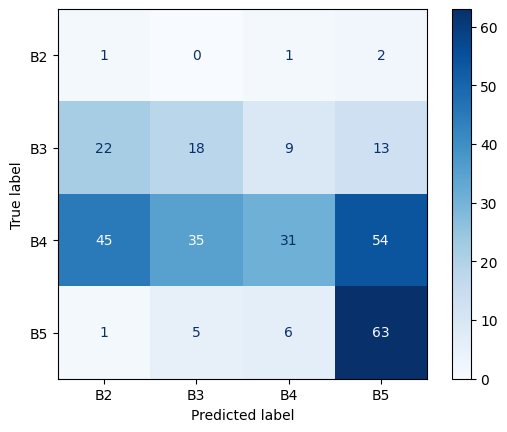

In [ ]:
from sklearn.metrics import classification_report
y_testt= y_testt_2 + y_testt_3 + y_testt_4+y_testt_5
y_hat = y_hat_2 +y_hat_3+y_hat_4+ y_hat_5
print(classification_report(y_testt ,y_hat , digits=4))


from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_testt, y_hat, average='macro')

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_testt, y_hat, labels=["b2", "b3","b4","b5"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["B2", "B3","B4","B5"])

disp.plot(cmap=plt.cm.Blues)

plt.show()
# true label==Radiologist's prediction (Note that this prediction is not always true! )
# predicted label==model's prediction

In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         8,19

 Total params: 134,268,740 (512.19 MB)

 Trainable params: 134,268,738 (512.19 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

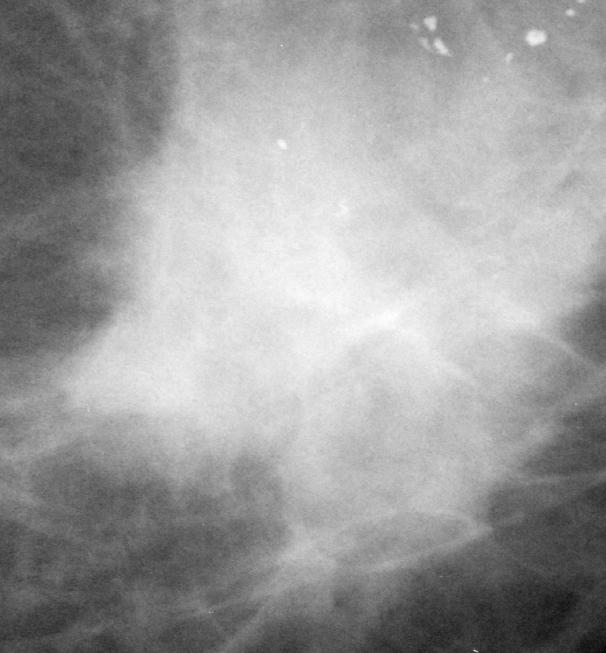

(1, 224, 224, 3)


In [ ]:
import os


import numpy as np
import tensorflow as tf
import keras


from IPython.display import Image, display
import matplotlib as mpl
import matplotlib.pyplot as plt


img_size = (224, 224)


last_conv_layer_name = "block5_conv3"


img_path = ".../CBIS_DDSM/Test/Malignant/b5/Mass-Test_P_00296_LEFT_CC_1.jpeg"
display(Image(img_path))


all_images=[]
for each_img in glob.glob(img_path):
    img=cv2.imread(each_img)
    img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    img=cv2.resize(img,(size,size))
    #img=cv2.merge([img,img,img])
    #img_resize= img/255
    all_images.append(img)



x=np.array(all_images)
print(x.shape)



In [ ]:
#The Grad-CAM algorithm

def get_img_array(img_path, size):

    img = keras.utils.load_img(img_path, target_size=size)

    array = keras.utils.img_to_array(img)

    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):

    grad_model = keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )


    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]


    grads = tape.gradient(class_channel, last_conv_layer_output)


    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))


    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)


    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


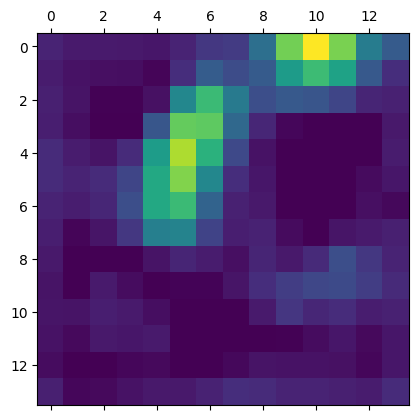

In [ ]:

img_array = x


# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()


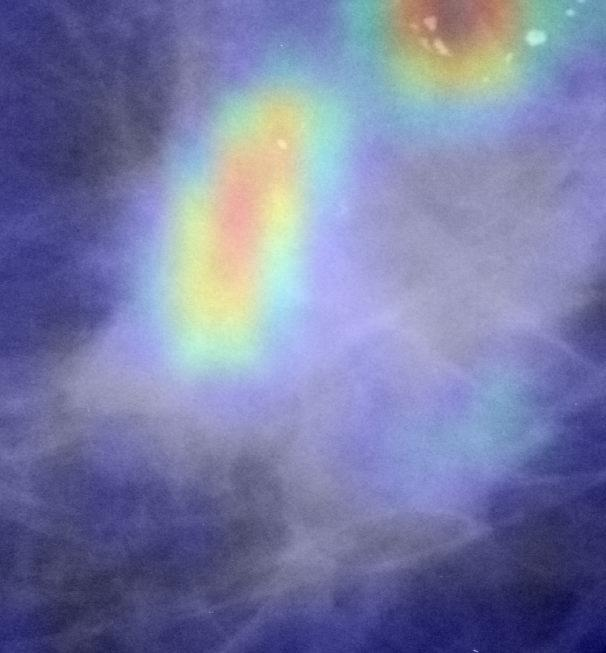

In [ ]:


def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.utils.load_img(img_path)
    img = keras.utils.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = mpl.colormaps["jet"]


    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]


    jet_heatmap = keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.utils.img_to_array(jet_heatmap)


    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.utils.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)


**With MC Dropout**

In [ ]:
num_MC_samples = 200
heat = []
for i in range(num_MC_samples):

    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
    heat.append(heatmap)

heatmap = np.mean(heat, axis=0)

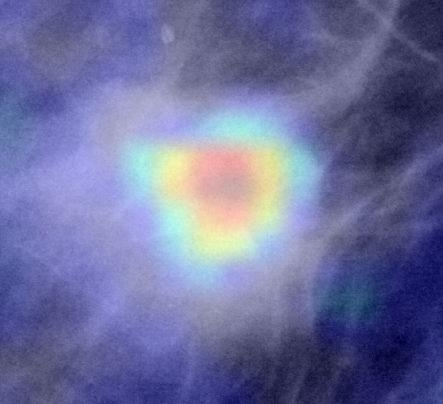

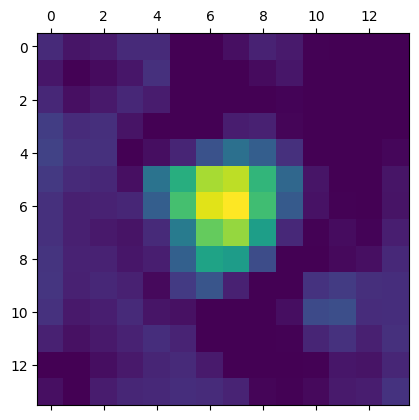

In [ ]:


def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.utils.load_img(img_path)
    img = keras.utils.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = mpl.colormaps["jet"]


    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]


    jet_heatmap = keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.utils.img_to_array(jet_heatmap)


    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.utils.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)
# Display heatmap
plt.matshow(heatmap)
plt.show()